In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**CONTEXT**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.*

*A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes*
*There can be various factors related to occurence to stroke. So using the data given we try to list out the potential factors by using various visualization techniques. *

**READ DATA**

In [3]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**CHECK FOR NULL VALUES**

In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*AS WE CAN SEE BMI CONTAINS NULL VALUES AND WE NEED TO FIX THIS*

***FILLING THE NULL VALUES WITH AVERAGE OF THE BMI'S***

In [5]:
avg = data['bmi'].mean()
avg

28.893236911794666

In [6]:
data.bmi=(data.bmi.fillna(28.74))

FOR ADULTS THE NORMAL BMI RANGE IS BETWEEN 18.5 TO 24.9 FOR ADULTS AND AS WE OBSERVE THAT AVERAGE BMI CALCULTION COMES OUT TO BE MORE THAN NORMAL THAT LARGE PROPROTION OF THE POPULATION IN THE GIVEN DATASET IS OVERWEIGHT

In [7]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

SO NOW NO NULL VALUES PRESENT

In [8]:
data.info() # THIS FUNCTION LETS US KNOW WHAT DATA TYPE VARIABLE ARE PROVIDED IN THE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.887209,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698075,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


So from above statistical description of the dataset we can see that mean age of people is around 43 years and mean bmi is more than normal

WHILE PLOTTING WE NEED TO KEEP IN MIND THAT AGAINST WHICH TYPE OF VARIABLES WE ARE PLOTTING THEN ONLY WE CAN DRAW INSIGHT FROM IT

**COUNTPLOT TO SEE THE DISTRIBUTION OF WORK_TYPE**

<AxesSubplot:xlabel='work_type', ylabel='count'>

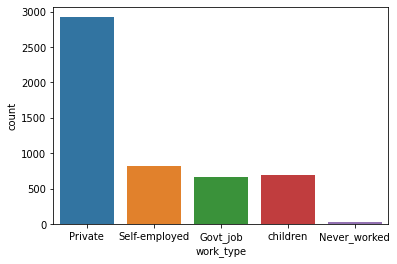

In [10]:
sns.countplot(data['work_type'])

THERE ARE LARGE NUMBER OF PEOPLE WHO WORK ON PRIVATE SECTOR 

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

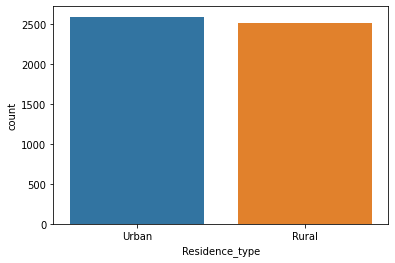

In [11]:
sns.countplot(data['Residence_type'])

THERE ARE ALMOST SAME NUMBER OF PEOPLE LIVING IN BOTH URBAN AND RURAL AREAS

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

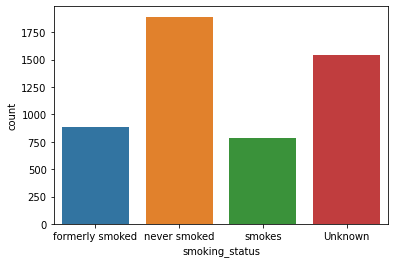

In [12]:
sns.countplot(data['smoking_status'])

GOOD TO SEE THAT MOST NUMBER OF PEOPLE NEVER SMOKED AS "SMOKING KILLS"

<AxesSubplot:xlabel='stroke', ylabel='count'>

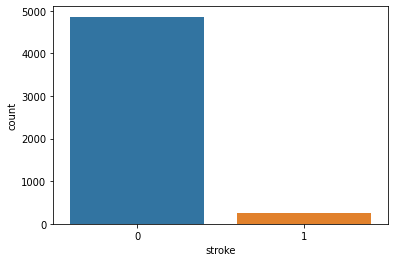

In [13]:
sns.countplot(data['stroke'])

THE ABOVE PLOT SHOWS THAT THERE IS **HIGH IMBALANCE** IN THE BOTH THE TARGET CLASSES AN WE NEED TO RESOLVE THIS ISSUE BEFORE APPLYING ANY ALGORITHM

<AxesSubplot:xlabel='ever_married', ylabel='count'>

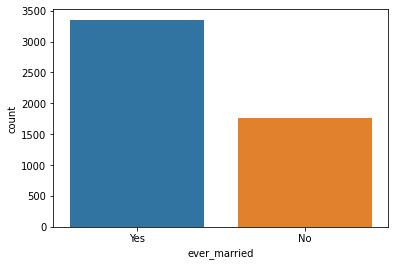

In [14]:
sns.countplot(data['ever_married'])

In [15]:
min_avg_glucose_level = min(data.avg_glucose_level)
max_avg_glucose_level = max(data.avg_glucose_level)
print(min_avg_glucose_level)
print(max_avg_glucose_level)

55.12
271.74


THE ABOVE MINIMUM AND MAXIMUM VALUES OF AVERAGE GLUCOSE LEVEL SHOWS THAT THE COLUMN NEEDS TO BE STANDARDIZED AS THERE IS VERY HIGH DIFFERENCE BETWEEN THEM

<AxesSubplot:xlabel='age', ylabel='Density'>

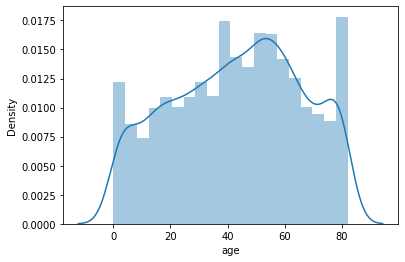

In [16]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

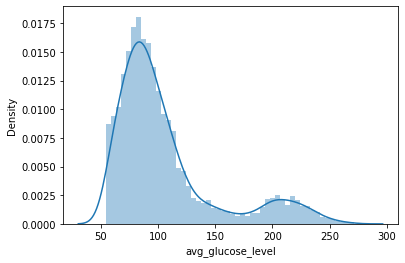

In [17]:
sns.distplot(data['avg_glucose_level'])

**MAPPING OF CATEGORICAL VARIABLES**

In [18]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [19]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

DATASET AFTER MAPPING OF CATEGORICAL VARIABLES

In [20]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,0,0,0,228.69,36.60,0,1
1,51676,1.0,61.0,0,0,0,1,1,202.21,28.74,1,1
2,31112,0.0,80.0,0,1,0,0,1,105.92,32.50,1,1
3,60182,1.0,49.0,0,0,0,0,0,171.23,34.40,2,1
4,1665,1.0,79.0,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1.0,80.0,1,0,0,0,0,83.75,28.74,1,0
5106,44873,1.0,81.0,0,0,0,1,0,125.20,40.00,1,0
5107,19723,1.0,35.0,0,0,0,1,1,82.99,30.60,1,0
5108,37544,0.0,51.0,0,0,0,0,1,166.29,25.60,0,0


**CORRELATION HEATMAP** TO CHECK FOR ANY CORRELATION BETWEEN VARIABLES

<AxesSubplot:>

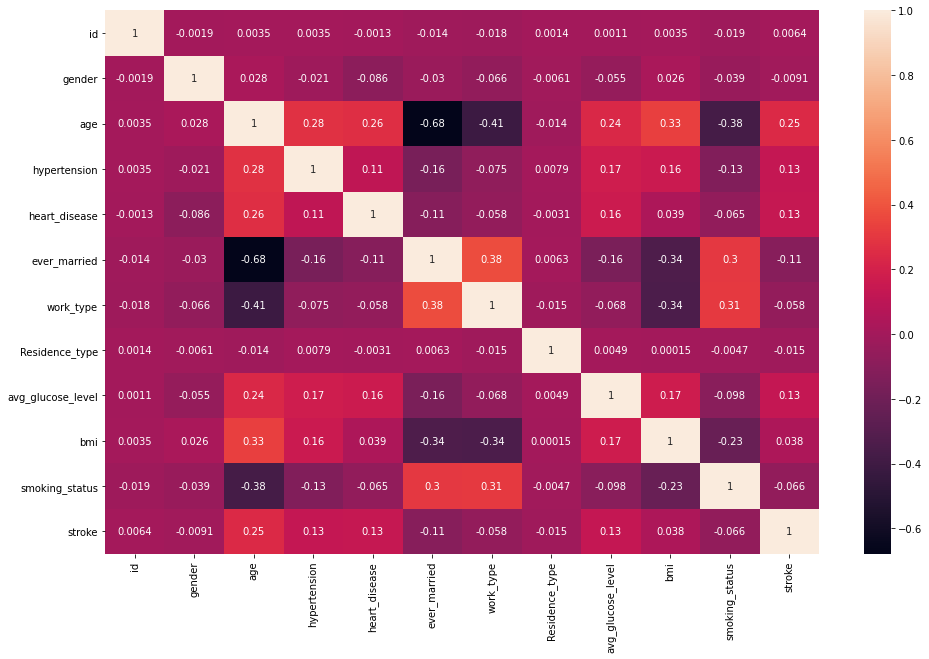

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

FROM THE ABOVE FIGURE WE CAN SEE THAT-
WORK_TYPE AND BMI - NEGATIVE CORRELATION
STROKE AND AGE HAS A POSITIVE CORRELATION
SIMILARLY MANY OTHER VARIABLES HAVE SUCH CORRELATION VALUES WE CANNOT REMOVE ANY VARIABLES. WE HAVE TO CONSIDER ALL THE VARIABLES FOR OUR MODEL

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

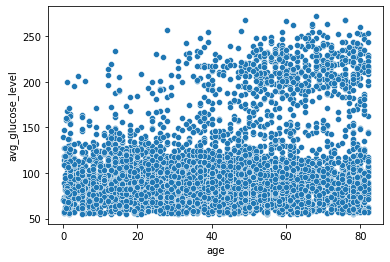

In [22]:
sns.scatterplot(x=data['age'], y=data['avg_glucose_level'])


FROM THE ABOVE SCATTER PLOT IT IS QUITE VISIBLE THAT AS THE AGE INCREASE IT LEADS TO INCREASE IN GLUCOSE LEVEL

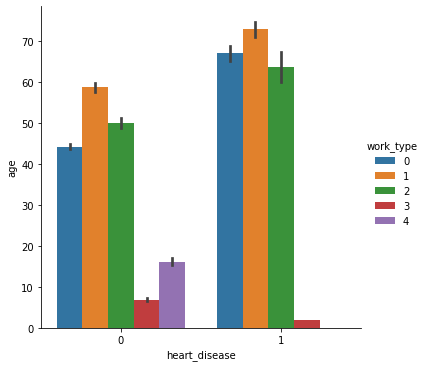

In [23]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=data)

PEOPLE WHO ARE SELF EMPLOYED ARE THE ONES WHO HAVE HEART DISEASE AND OBVIOUSLY LEAST NUMBERS ARE OF CHILDREN

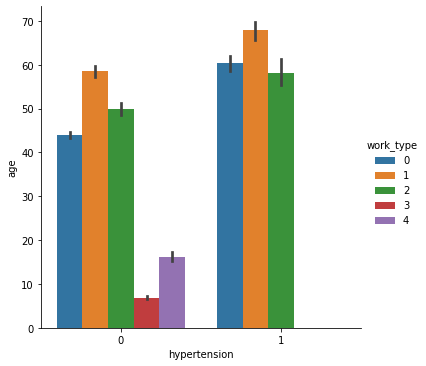

In [24]:
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=data)

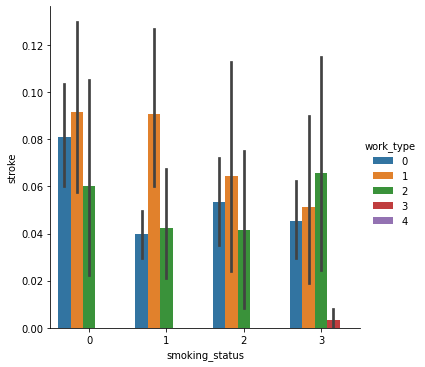

In [25]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=data)

AGAIN SELF-EMPLOYED PEOPLE HAVE HIGHER RISK OF STROKE. THIS SHOWS THAT THESE PEOPLE ARE MORE VULNERABLE TO DIFFERENT DISEASES AS THEY CARRY LOT OF TENSION OF EARNINGS AND FAMILY INCOME

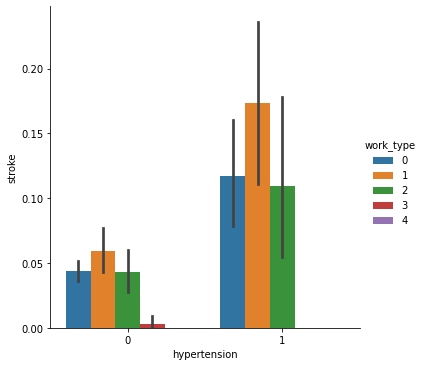

In [26]:
sns.catplot(x="hypertension", y="stroke", hue="work_type", kind="bar", data=data)

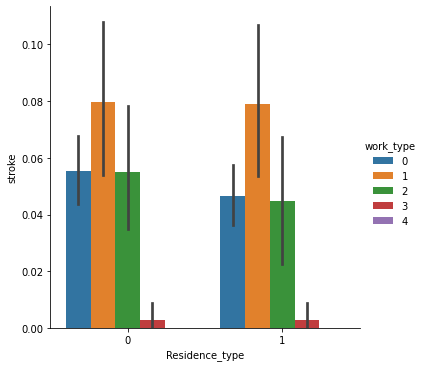

In [27]:
sns.catplot(x="Residence_type", y="stroke", hue="work_type", kind="bar", data=data)

TYPE OF RESIDENCE HARDLY MAKES ANY DIFFERENCE TO DISEASE

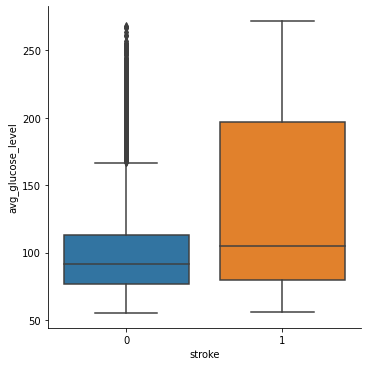

In [28]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

PEOPLE HAVING HIGHER GLUCOSE LEVEL ARE AT HIGH RISK OF STROKE

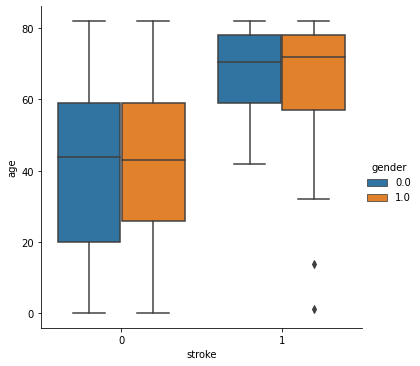

In [29]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

HIGH AGE FEMALES ARE AT THE RISK TO STROKE

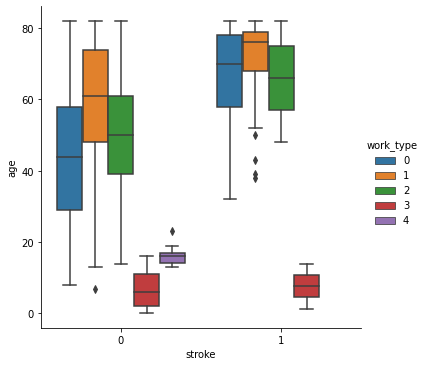

In [30]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=data)

**APPLY MACHINE LEARNING ALGORITHM FOR PREDICTION**

DIVIDING THE DATASET INTO FEATURES AND LABELE

In [31]:
features = ['id','age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

ONCE AGAIN CHECK FOR NULL VALUES IN THE DATASET

In [32]:
X.isnull().sum() #WE STILL HAVE 1 NULL VALUE IN THE GENDER COLUMN

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               1
work_type            0
smoking_status       0
dtype: int64

In [33]:
X.gender=(X.gender.fillna(1))

In [34]:
X.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

SINCE THE TARGET CLASS IS HIGHLY IMBALANCED, WE NEED TO TREAT IT AS IT'S PRESENCE WILL LEAD TO POOR PERFORMANCE OF THE MODEL. HERE I HAVE USED SMOTE (Synthetic Minority Oversampling Technique) TECHNIQUE. SMOTE WORKS BY RANDOMNLY PICKING A POINT FROM MINORITY CLASS AND COMPUTING A K-NEAREST NEIGHBOURS FOR THIS POINT.

**TREATING IMBALANCE CLASS USING SMOTE**

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

SPLITTING OF DATASET INTO TRAIN AND TEST

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [37]:
testing = X_test['id'] #taking ID column for the purpose of submission
testing

315     41940
534     71808
1427     5984
9125    59078
6025    54555
        ...  
3065    46455
8270    42030
6574    12032
2487    44325
620     34558
Name: id, Length: 1605, dtype: int64

AS ID COLUMN DOES NOT AFFETCT THE MODEL'S PERFORMANCE, WE DROP IT

In [38]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

STANDARDIZATION OF THE DATA IS REQUIRED AS DATA ARE IN DIFFERENT SCALES

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

DATA POINTS AFTER STANDARDIZATION:

In [40]:
X_train

array([[-0.04544913, -0.29915684, -0.21781393, ...,  0.94278689,
        -0.61449853,  0.70069914],
       [ 1.11909028, -0.29915684, -0.21781393, ...,  0.11686953,
        -0.61449853, -0.25503981],
       [ 1.00814118, -0.29915684, -0.21781393, ...,  0.94278689,
         0.47247293,  1.65643808],
       ...,
       [ 0.72051227, -0.29915684, -0.21781393, ...,  0.94278689,
        -0.61449853,  0.70069914],
       [-0.41794625, -0.29915684, -0.21781393, ...,  0.94278689,
        -0.61449853,  0.70069914],
       [ 0.75716492, -0.29915684, -0.21781393, ..., -0.74248068,
        -0.61449853, -0.25503981]])

In [41]:
X_test

array([[ 0.09423729, -0.29915684,  4.59107461, ..., -1.26734724,
        -0.61449853, -1.21077876],
       [-1.62856191, -0.29915684, -0.21781393, ...,  0.94278689,
        -0.61449853,  1.65643808],
       [-1.39575121, -0.29915684, -0.21781393, ..., -1.26734724,
        -0.61449853,  0.70069914],
       ...,
       [ 0.21968599, -0.29915684, -0.21781393, ...,  0.94278689,
        -0.61449853,  0.70069914],
       [ 1.07204225, -0.29915684, -0.21781393, ..., -1.26734724,
         0.47247293,  0.70069914],
       [-1.02325408, -0.29915684, -0.21781393, ..., -1.26734724,
        -0.61449853, -0.25503981]])

LET'S APPLY **LOGISTIC REGRESSION**

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression()

In [43]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 1, 1, 0])

CLASSIFICATION REPORT OF LOGISTIC REGRESSION

In [44]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred_log_reg)
print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       803
           1       0.79      0.85      0.82       802

    accuracy                           0.81      1605
   macro avg       0.81      0.81      0.81      1605
weighted avg       0.81      0.81      0.81      1605



VALUES OF F1 SCORE SHOWS THAT THE MODEL IS PERFORMING QUITE WELL

In [45]:
auc = roc_auc_score(y_test, y_pred_log_reg)
auc

0.8124823371210828

AUC SCORE OF AROUND 80% IS QUITE GOOD. MODEL IS ABLE TO CLASSIFY THE CLASSES VERY WELL

In [46]:
cm = confusion_matrix(y_test, y_pred_log_reg)
cm

array([[625, 178],
       [123, 679]])

In [47]:
predicted_probab_log = log_reg.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

**ROC CURVE**

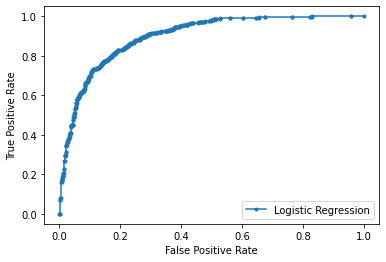

In [48]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

LOGISTIC REGRESSION IS PERFORMING WELL, BUT CAN WE IMPROVE PERFORMANCE USING ANOTHER MODEL? LET'S APPLY ANOTHER ALGORITHM

**RANDOM FOREST**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rfc_predict = rfc.predict(X_test)
roc_auc_score(y_test, rfc_predict)

0.9183780896451275

AUC SCORE HAS INCREASED TO **94%**. AMAZING!!

In [51]:
cm = confusion_matrix(y_test, rfc_predict)
cm

array([[740,  63],
       [ 68, 734]])

CALCULATION OF F1 SCORE

In [52]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.9180737961225766


In [53]:
predicted_probab = rfc.predict_proba(X_test)

In [54]:
predicted_probab = predicted_probab[:, 1]

In [55]:
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

**ROC CURVE**

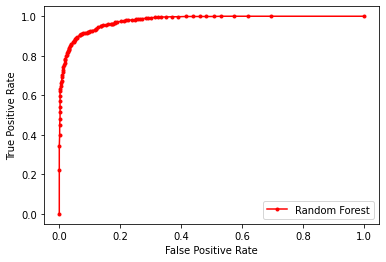

In [56]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='red', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

LET'S SEE IF WE CAN IMPROVE IT FURTHER USING ANOTHER MODEL

**XGBOOST CLASSIFIER**

In [57]:
import xgboost as xgb

In [58]:
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

[06:52:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred1 = model.predict(X_test)

In [60]:
roc_auc_score(y_test, y_pred1)

0.9451557904740019

WOW!! AUC SCORE INCREASED

In [61]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[779,  24],
       [ 64, 738]])

In [62]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.9437340153452685


AMAZING F1 SCORE

In [63]:
predicted_probab = model.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)

**ROC CURVE**

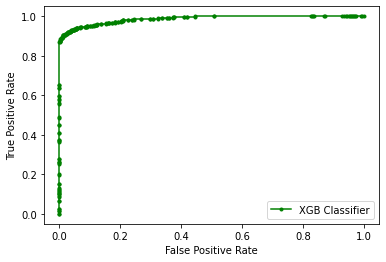

In [64]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', color='green',label='XGB Classifier')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [65]:

my_submission = pd.DataFrame({'Id': testing, 'Stroke': y_pred1})
my_submission.to_csv('submission.csv', index=False)
my_submission = pd.read_csv('submission.csv')
my_submission


,Id,Stroke
0,41940,0
1,71808,0
2,5984,0
3,59078,1
4,54555,1
...,...,...
1600,46455,0
1601,42030,1
1602,12032,1
1603,44325,1


**LET'S FIND OUT THE BEST PARAMETERS**

In [66]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [67]:
xgb = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

**APPLYING GRID SEARCH**

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4,  verbose=3, random_state=1001 )
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[06:53:29] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:53:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [69]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([3.20975375, 4.37297201, 4.21255774, 3.48409257, 3.9086494 ]), 'std_fit_time': array([0.07998118, 0.14224733, 0.01631694, 0.04323706, 0.54490719]), 'mean_score_time': array([0.02476234, 0.03958912, 0.03253889, 0.02756348, 0.02276206]), 'std_score_time': array([0.00813417, 0.00828619, 0.00087941, 0.00137331, 0.00425986]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

**CONCLUSION**

IN THE GIVEN DATASET WE FIRT APPLIED GENERAL PREPROCESSING TO REMOVE/IMPUTE MISSING VALUES. STANDARDIZATION WAS IMPORTANT AS INDEPENDENT FEATURES WERE IN DIFFERENT SCALES.
WE MUST MAKE SURE THAT RARGET CLASS IS NOT IMBALANCED AND IF IT IS SO THEN WE MUST HANDLE IT USING APPROPRIATE TECHNIQUE.
AMONG THREE MODELS APPLIED, XGBOOST WAS FOUND TO BE THE MOST SUCCESSFUL WITH F1 SCORE OF AROUND 95%. IN SUCH TYPE OF DATASET LIKE THIS WHERE THERE IS HIGH CLASS IMBALANCE ACCURACY METRIC SHOULD NOT BE RELIED ON. WE MUST SEE CONFUSION MATRIX FOR CLEAR INSIGHT OF HOW THE MODEL IS PERFORMING.


IF YOU FIND THIS NOTEBOOK USEFUL THEN PLEASE UPVOTE!!



THANK YOU..